In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from batteryprobe.data import create_data_loader
from batteryprobe.loops import evaluate

In [3]:
import pandas as pd
from torch.nn.utils.rnn import pad_packed_sequence

In [4]:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [5]:
df = pd.read_csv("data_54.38.188.95/all.csv")
df = df.iloc[::5]
df

,Unnamed: 0,time,battery_status,manufacturer,os,uuid,charge_full,mean_fans_rpm,current_now,voltage_min_design,...,battery_temp,cpu_temp,swap_load,fans_rpm,ram_load,number_of_fans,capacity,charge_full_design,charge_now,load_average_15
0,0,1.601834e+09,Charging,SWD,macos,13370f11455f4f36a0680b9725189375,4089.0,0.0,2053.0,NaN,...,40.00,55.63,NaN,NaN,NaN,2.0,NaN,5088.0,3289.0,2.63
5,5,1.601834e+09,Charging,SWD,macos,13370f11455f4f36a0680b9725189375,4089.0,0.0,1863.0,NaN,...,40.09,58.56,NaN,NaN,NaN,2.0,NaN,5088.0,3354.0,2.69
10,10,1.601834e+09,Full,BYD,linux,5fbc9f85604740eb85dbf9dbd495de67,2760.0,NaN,1.0,11400.0,...,NaN,56.00,36572.0,0.0,7603168.0,NaN,100.0,3684.0,2760.0,2.12
15,15,1.601834e+09,Charging,SWD,macos,13370f11455f4f36a0680b9725189375,4089.0,0.0,1756.0,NaN,...,40.00,55.50,NaN,NaN,NaN,2.0,NaN,5088.0,3383.0,2.76
20,20,1.601834e+09,Charging,SWD,macos,13370f11455f4f36a0680b9725189375,4089.0,0.0,1682.0,NaN,...,38.80,59.00,NaN,NaN,NaN,2.0,NaN,5088.0,3411.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369425,369425,1.606920e+09,Charging,BYD,linux,0a236299cff2433fbd19467990418ba4,NaN,NaN,200.0,11400.0,...,NaN,NaN,43140.0,0.0,7413400.0,NaN,NaN,NaN,NaN,2.39
369430,369430,1.606920e+09,Charging,BYD,linux,0a236299cff2433fbd19467990418ba4,NaN,NaN,NaN,11400.0,...,NaN,NaN,43140.0,NaN,7431924.0,NaN,NaN,NaN,NaN,2.40
369435,369435,1.606920e+09,Charging,BYD,linux,0a236299cff2433fbd19467990418ba4,NaN,NaN,NaN,11400.0,...,NaN,NaN,43140.0,NaN,7437756.0,NaN,NaN,NaN,NaN,NaN
369440,369440,1.606920e+09,Full,BYD,linux,0a236299cff2433fbd19467990418ba4,NaN,NaN,NaN,11400.0,...,NaN,NaN,43140.0,NaN,7406704.0,NaN,NaN,NaN,NaN,NaN


In [6]:
params = {
    "max_gap_between_sessions": 400,
    "min_num_points_per_session": 10,
    "min_session_duration": 600,
    "label_lower_bound": 0.2,
    "label_upper_bound": 0.5,
    "train_split": 0.7,
    "features": [
        #'charge_full',
        'current_now',
        'n_running_threads',
        'load_average_5',
        'load_average_1',
        'load_average_15',
        #'voltage_now',
        'cpu_temp',
        #'fans_rpm',
        'charge_full_design',
        'charge_now',
    ],
    "context": [
        #'time',
        'epoch_sin_day',
        'battery_status_Charging',
        'battery_status_Discharging',
        'os_linux',
        'os_macos'
    ],
    "batch_size": 12,
    "repeat": 10,
}

# Hi deepnote dev team
# we like your product
# do you want us to beta test it ?

we need money

  1. Faire la différences entre les features et les contexts dans `params`
  1. Séparer les features du context dans `data.py`
  1. Mettre context en entrée du model (forward) (+ taille des couches en paramètre du modèle)
  1. Modifier training

In [7]:
train, val = create_data_loader(df, params)

INFO:root:24724 data points
DEBUG:root:13370f11455f4f36a0680b9725189375 - 3865 points
DEBUG:root:Extracted 80 sessions
DEBUG:root:5fbc9f85604740eb85dbf9dbd495de67 - 1105 points
DEBUG:root:Extracted 29 sessions
DEBUG:root:0a236299cff2433fbd19467990418ba4 - 7646 points
DEBUG:root:Extracted 111 sessions
DEBUG:root:e7bbfc496d57492a82e68d8cf2835761 - 4 points
DEBUG:root:Extracted 0 sessions
DEBUG:root:6c328af026994ab5ae14d1eb27d92e2b - 8675 points
DEBUG:root:Extracted 143 sessions
DEBUG:root:e18acda9486c41fc8d19777cd114ac39 - 3429 points
DEBUG:root:Extracted 69 sessions
INFO:root:Extracted 432 sessions


In [8]:
print(len(train), len(val))

252 109


In [9]:
for (inputs, context), label in train:
    unpacked_inputs, lengths = pad_packed_sequence(inputs, batch_first=True, padding_value=-999)
    print(unpacked_inputs.shape)
    print(lengths)
    unpacked_context, lengths = pad_packed_sequence(context, batch_first=True, padding_value=-999)
    print(unpacked_context.shape)
    print(lengths)
    break

torch.Size([12, 70, 13])
tensor([ 4, 20,  9, 70, 24, 38, 17, 15, 43, 17, 15, 10])
torch.Size([12, 99, 5])
tensor([ 8, 31, 17, 99, 50, 49, 31, 25, 99, 46, 17, 21])


In [10]:
target_col = params["features"].index("charge_now")
target_col

7

In [11]:
import matplotlib.pyplot as plt
import numpy as np

torch.Size([12, 44, 13])
torch.Size([12, 79, 8])


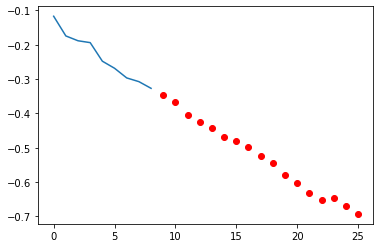

In [12]:
for (inputs, context), labels in train:
    inputs, inputs_len = pad_packed_sequence(inputs, batch_first=True, padding_value=-999)
    labels, labels_len = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
    print(inputs.shape) 
    print(labels.shape)
    plt.plot(
        np.arange(0, inputs_len[0]), 
        inputs[0, :inputs_len[0], target_col]
    )
    plt.plot(
        np.arange(inputs_len[0], labels_len[0]+inputs_len[0]), 
        labels[0, :labels_len[0], target_col], "ro"
    )
    plt.show()
    break

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torch.nn.utils.rnn import pad_sequence

from batteryprobe.utils import pad_and_pack, masked_l1

---
### DEPRECATED
### vvv

In [ ]:
class Baseline(nn.Module):
    def __init__(self, target_col):
        super(Baseline, self).__init__()
        self.target_col = target_col
        
    def forward(self, x, out_steps):
        pad_x, lengths = pad_packed_sequence(x, batch_first=True, padding_value=-999)
        
        # Compute slope
        h = (pad_x[np.arange(pad_x.shape[0]), lengths-1, self.target_col] - 
            pad_x[np.arange(pad_x.shape[0]), 0, self.target_col])
        b = (pad_x[np.arange(pad_x.shape[0]), lengths-1, 0] - 
            pad_x[np.arange(pad_x.shape[0]), 0, 0])
        slope = h / b
        
        batch = []
        for i, length in enumerate(out_steps):
            res = torch.zeros((length, pad_x.shape[2]))
            res[:, self.target_col] = (pad_x[i, length-1, 0] - pad_x[i, 0, 0]
            ) #* slope[i] + pad_x[i, 0, self.target_col]
            batch.append(res)
        return pad_and_pack(batch)
#         res[:, :, self.target_col] = (out_steps - x[:, 0, 0]
#         ) * slope + x[:, 0, self.target_col]
#         return res

In [ ]:
baseline = Baseline(target_col)

In [ ]:
for inputs, labels in train:
    out_steps = pad_packed_sequence(labels, batch_first=True, padding_value=-999)[1]
    outputs = baseline(inputs.float(), out_steps)
    pad_outputs, _ = pad_packed_sequence(outputs, batch_first=True, padding_value=-999)
    print(pad_outputs.shape)
    break

IndexError: index 31 is out of bounds for dimension 1 with size 19

In [ ]:
score = evaluate(baseline, val, target_col=target_col)
print(score)

Loss 1372.17516: 100%|██████████| 167/167 [00:02<00:00, 64.07it/s]

1372.1751579497252


torch.Size([12, 19, 13])
torch.Size([12, 32, 13])


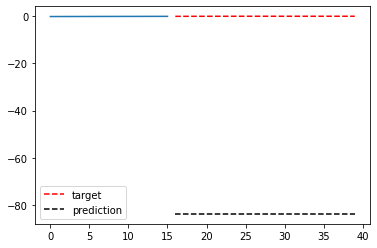

In [ ]:
for inputs, labels in train:
    _, out_steps = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
    outputs = baseline(inputs.float(), out_steps)
    
    inputs, inputs_len = pad_packed_sequence(inputs, batch_first=True, padding_value=-999)
    labels, labels_len = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
    outputs, outputs_len = pad_packed_sequence(outputs, batch_first=True, padding_value=-999)
    outputs = outputs.detach().numpy()
    
    print(inputs.shape) 
    print(labels.shape)
    
    plt.plot(
        np.arange(0, inputs_len[0]), 
        inputs[0, :inputs_len[0], target_col]
    )
    plt.plot(
        np.arange(inputs_len[0], labels_len[0]+inputs_len[0]), 
        labels[0, :labels_len[0], target_col], "r--", label="target"
    )
    plt.plot(
        np.arange(inputs_len[0], outputs_len[0]+inputs_len[0]), 
        outputs[0, :outputs_len[0], target_col], "k--", label="prediction"
    )    
    plt.legend()
    plt.show()
    break

### ^^^
### DEPRECATED
---

In [41]:
class AutoRegressive(nn.Module):
    def __init__(self, params):
        self.params = params
        super(AutoRegressive, self).__init__()
        self.in_size = len(self.params["features"]) + len(self.params["context"])
        self.out_size = len(self.params["features"])
        self.lstm = nn.LSTM(self.in_size, 32, batch_first=True)
        self.dense = nn.Linear(32, self.out_size)
    
    def forward(self, x, context):
        predictions = []
        x, warmup_state = self.warmup(x)
        predictions.append(x)
        print(type(context))
        
        context, lengths_context = pad_packed_sequence(context, batch_first=True, padding_value=-999)
        # Loop over every element of a batch
        batch = []
        for i, element in enumerate(x):
            # State corresponding to a single element in a batch
            state = (
                warmup_state[0][:, i, :][None, :],
                warmup_state[1][:, i, :][None, :],
            )
            
            # Add first prediction from warmup
            timestamps = [element[None, None, :]]
            
            # Predict values
            for t in range(lengths_context[i]-1):
                # The order here is important. Inputs features should be first
                in_tensor = torch.cat([element, context[i, t, :]], axis=-1)[None, None, :] 
                x, state = self.lstm(in_tensor, state)
                x = self.dense(x)
                timestamps.append(x)
            batch.append(torch.cat(timestamps, 1)[0])

        # Pack and pad sequence
        return pad_and_pack(batch)

    def warmup(self, x):
        x, state = self.lstm(x)
        x, lengths = pad_packed_sequence(x, batch_first=True, padding_value=-999)
        x = torch.stack([x[i, length-1] for i, length in enumerate(lengths)])
        x = self.dense(x)
        return x, state 

In [14]:
from batteryprobe.models import AutoRegressive

In [15]:
model = AutoRegressive(params)

In [16]:
for (inputs, context), labels in train:
    #print(inputs)
    #print(labels)
    print("OUT", model(inputs.float(), context.float()))
    break

OUT PackedSequence(data=tensor([[-0.0346,  0.1403,  0.0300,  ...,  0.0820, -0.0927, -0.0065],
        [-0.0285,  0.1355, -0.0325,  ..., -0.0447, -0.0489, -0.0010],
        [-0.0303,  0.1496,  0.0761,  ...,  0.0814, -0.0790,  0.0515],
        ...,
        [-0.0556,  0.1492, -0.0238,  ...,  0.0793, -0.0362,  0.0029],
        [-0.0555,  0.1493, -0.0237,  ...,  0.0794, -0.0362,  0.0029],
        [-0.0555,  0.1493, -0.0236,  ...,  0.0796, -0.0361,  0.0030]],
       grad_fn=<PackPaddedSequenceBackward>), batch_sizes=tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10,  9,  9,  9,  9,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  6,  6,  6,  6,  6,  6,
         5,  5,  5,  5,  5,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1]), sorted_indices=tensor([11,  3,  2,  6,  4, 10,  8,  9,  1,  7,  0,  5]), unsorted_indices=tensor([10,  8,  2,  1,  4, 11,  3,  9,  6,  7,  5,  0]))


In [19]:
N_EPOCHS = 2
LEARNING_RATE = 3e-3

criterion = masked_l1
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

history = []
val_history = []

for epoch in range(N_EPOCHS):
    
    # Training 
    running_loss = 0
    pbar = tqdm(train) 
    for i, ((inputs, context), labels) in enumerate(pbar):
        optimizer.zero_grad()
        
        # Find number of out steps for each element in the batch
        out_steps = pad_packed_sequence(labels, batch_first=True, padding_value=-999)[1]
        outputs = model(inputs.float(), context.float())
        
        # Pad packed labels and outputs
        pad_labels, _ = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
        pad_outputs, _ = pad_packed_sequence(outputs, batch_first=True, padding_value=-999)

        loss = criterion(pad_outputs, pad_labels.float()) # Loss = entre outputs (12) et les labels (12)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if not (i % 5):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}\t"
            )
    history.append(running_loss / (i+1))

    # Validation
    val_running_loss = 0
    pbar = tqdm(val)
    with torch.no_grad():
        for j, ((inputs, context), labels) in enumerate(pbar):
            out_steps = pad_packed_sequence(labels, batch_first=True, padding_value=-999)[1]
            
            outputs = model(inputs.float(), context.float())
            
            # Pad packed labels and outputs
            pad_labels, _ = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
            pad_outputs, _ = pad_packed_sequence(outputs, batch_first=True, padding_value=-999)

            val_running_loss += criterion(pad_outputs, pad_labels.float())  # MSE per batch
            pbar.set_description(
                f"Validation loss = {val_running_loss / (j+1):.5f}\t"
            )
    val_history.append(val_running_loss / (j+1))

Validation loss = 0.28954	: 100%|██████████| 109/109 [00:12<00:00,  8.66it/s]


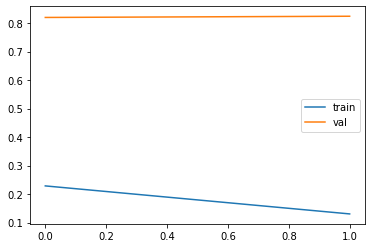

In [39]:
plt.plot(history, label="train")
plt.plot(val_history, label="val")
plt.legend()
plt.show()

In [40]:
score = evaluate(model, train, target_col=target_col)
print(score)

Loss 0.05144: 100%|██████████| 167/167 [00:20<00:00,  8.13it/s]

0.05143630019531271


torch.Size([12, 25, 13])
torch.Size([12, 39, 8])


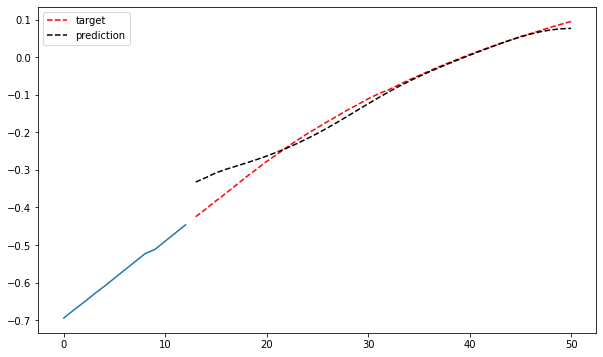

In [75]:
for (inputs, context), labels in train:
    outputs = model(inputs.float(), context.float())
    
    inputs, inputs_len = pad_packed_sequence(inputs, batch_first=True, padding_value=-999)
    labels, labels_len = pad_packed_sequence(labels, batch_first=True, padding_value=-999)
    outputs, outputs_len = pad_packed_sequence(outputs, batch_first=True, padding_value=-999)
    outputs = outputs.detach().numpy()
    
    print(inputs.shape) 
    print(labels.shape)
    
    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(0, inputs_len[0]), 
        inputs[0, :inputs_len[0], target_col]
    )
    plt.plot(
        np.arange(inputs_len[0], labels_len[0]+inputs_len[0]), 
        labels[0, :labels_len[0], target_col], "r--", label="target"
    )
    plt.plot(
        np.arange(inputs_len[0], outputs_len[0]+inputs_len[0]), 
        outputs[0, :outputs_len[0], target_col], "k--", label="prediction"
    )    
    plt.legend()
    plt.show()
    break